In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
raw_data = pd.read_csv("C:/Users/mmarz/Deep-learning/Titanic - ensembling stacking/train.csv")
data = raw_data.copy()

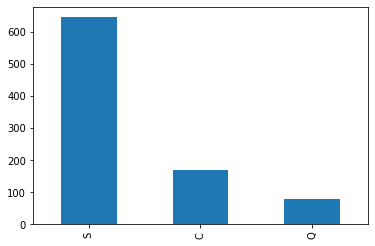

In [4]:
data = data.drop(["PassengerId", "Name","Cabin","Ticket"],axis=1)
age_median = data["Age"].median()
data["Age"] = data["Age"].fillna(age_median)
data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"].value_counts().plot(kind='bar')
data = pd.get_dummies(data,drop_first=True)
plt.show()

In [5]:
LEN = len(data)*0.8
train = data.iloc[:int(LEN),]
test = data.iloc[int(LEN):,]
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
707,1,1,42.0,0,0,26.2875,1,0,1
708,1,1,22.0,0,0,151.5500,0,0,1
709,1,3,28.0,1,1,15.2458,1,0,0
710,1,1,24.0,0,0,49.5042,0,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
y_train = train["Survived"].to_numpy()
x_train = preprocessing.scale(train.drop(["Survived"],axis=1).to_numpy())
y_test
x_test

In [18]:
model = LogisticRegression().fit(x,y)
